# Author Birth Sign Detection From blog authorship corpus
**Digital content management**

**DATASET**: <a href='https://www.kaggle.com/datasets/jayabharathihari/blogtext-digital-content-management'>Digital content management Blog Text



**CONTEXT**: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc.
are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a
classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem

**DATA DESCRIPTION:** Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17), 
• 8086 "20s" blogs(ages 23-27) and 
• 2994 "30s" blogs (ages 33-47) 
• For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link.

**PROJECT OBJECTIVE**: To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable

In [ ]:
#Importing packages.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')l

In [ ]:
#Mounting the packages
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#assigning the data to a variable.
blog_df = pd.read_csv('/content/drive/MyDrive/GL_files/GL_Dataset/blogtext.csv')

# **1. Exploratory data analysis (EDA)**



In [ ]:
#Printing the shape and sample of the dataset
print(blog_df.shape)
blog_df.sample(5)

(681284, 7)


,id,gender,age,topic,sign,date,text
46340,3147307,male,15,Student,Gemini,"07,July,2004",After a complaint from urlLink Reb...
245575,3964940,male,27,Military,Taurus,"20,July,2004",I'm still trying to find pictures of th...
441610,3943296,male,15,Non-Profit,Scorpio,"15,July,2004",I have decided (seeing as i am now ...
304967,470861,male,27,indUnk,Cancer,"05,April,2002",So Edward sent me this cute l...
291598,4067531,female,17,indUnk,Aquarius,"29,July,2004","Oh, my gawd, is all i can say. You..."


In [ ]:
#understanding the stats
blog_df.describe()

,id,age
count,6.812840e+05,681284.000000
mean,2.397802e+06,23.932326
std,1.247723e+06,7.786009
min,5.114000e+03,13.000000
25%,1.239610e+06,17.000000
50%,2.607577e+06,24.000000
75%,3.525660e+06,26.000000
max,4.337650e+06,48.000000


In [ ]:
blog_df['gender'].value_counts()

male      345193
female    336091
Name: gender, dtype: int64

In [ ]:
blog_df['age'].value_counts().sort_values()

44     2044
47     2207
46     2733
42     2908
48     3572
41     3738
43     4230
45     4482
40     5016
39     5556
38     7545
37     9317
13    13133
36    14229
35    17462
33    17584
34    21347
14    27400
15    41767
27    46124
26    55312
25    67051
16    72708
23    72889
24    80071
17    80859
Name: age, dtype: int64

In [ ]:
blog_df['topic'].value_counts().sort_values()

Maritime                      280
Environment                   592
Construction                 1093
Agriculture                  1235
Automotive                   1244
InvestmentBanking            1292
Architecture                 1638
LawEnforcement-Security      1878
Tourism                      1942
Biotech                      2234
Manufacturing                2272
Transportation               2326
RealEstate                   2870
HumanResources               3010
Sports-Recreation            3038
Museums-Libraries            3096
Military                     3128
Accounting                   3832
Telecommunications           3891
Chemicals                    3928
Banking                      4049
BusinessServices             4500
Advertising                  4676
Marketing                    4769
Fashion                      4851
Religion                     5235
Consulting                   5862
Government                   6907
Science                      7269
Publishing    

In [ ]:
blog_df['sign'].value_counts().sort_values()

Capricorn      49201
Aquarius       49687
Sagittarius    50036
Gemini         51985
Leo            53811
Pisces         54053
Scorpio        57161
Virgo          60399
Libra          62363
Taurus         62561
Aries          64979
Cancer         65048
Name: sign, dtype: int64

In [ ]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


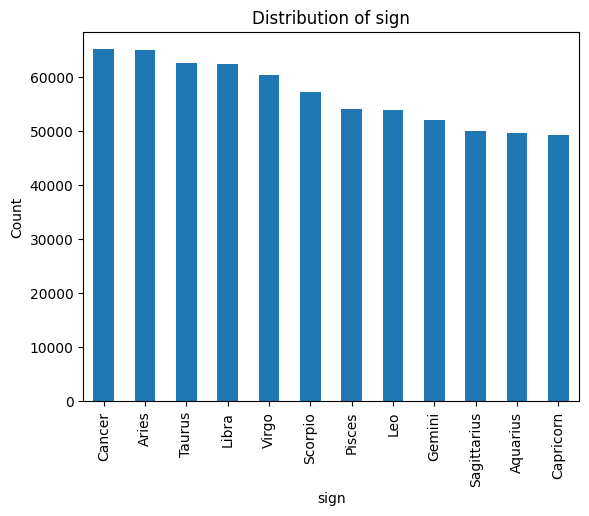

In [ ]:
blog_df['sign'].value_counts().plot(kind='bar')
plt.xlabel('sign')
plt.ylabel('Count')
plt.title('Distribution of sign')
plt.show()

**Gender Distribution: **The dataset exhibits a slightly greater presence of male bloggers (345,193) compared to their female counterparts (336,091), indicating a relatively balanced distribution between the genders within the dataset.

**Age Distribution:** Diverse age groups are represented in the dataset, with the highest concentration observed among bloggers aged 17 to 24, boasting around 80,000 bloggers in each bracket. The blogger count gradually decreases with increasing age, reaching its lowest point among bloggers in their 40s.

**Topic Distribution:** The dataset encompasses a broad spectrum of topics, with a noteworthy number of bloggers falling under the 'indUnk' (Individual, Unknown) category, comprising the largest count at 251,015. The 'Student' category also holds substantial representation, featuring 153,903 bloggers. Additional prevalent topics include 'Technology,' 'Arts,' 'Education,' and 'Communications-Media.' The diverse distribution across various topics underscores the dataset's richness, reflecting a wide array of interests and subject matter expertise among bloggers.

These insights provide valuable comprehension of the demographic and topical composition of bloggers in the dataset. Such understanding can guide subsequent analyses, facilitate effective feature engineering, and inform model development for your multi-label classification project.

In [ ]:
blog_df = pd.read_csv('/content/drive/MyDrive/GL_files/GL_Dataset/blogtext.csv',nrows=5000)

In [ ]:
# Create a new dataframe with two columns
blog_df = blog_df[["sign", "text"]]

In [ ]:
print(blog_df.shape)
blog_df.head()

(5000, 2)


,sign,text
0,Leo,"Info has been found (+/- 100 pages,..."
1,Leo,These are the team members: Drewe...
2,Leo,In het kader van kernfusie op aarde...
3,Leo,testing!!! testing!!!
4,Aquarius,Thanks to Yahoo!'s Toolbar I can ...


In [ ]:
pd.DataFrame(blog_df.sign.unique()).values

array([['Leo'],
       ['Aquarius'],
       ['Aries'],
       ['Capricorn'],
       ['Gemini'],
       ['Cancer'],
       ['Sagittarius'],
       ['Scorpio'],
       ['Libra'],
       ['Virgo'],
       ['Taurus'],
       ['Pisces']], dtype=object)

In [ ]:
# Generate a novel column named 'sign_id' containing encoded categories.
blog_df["sign_id"] = blog_df["sign"].factorize()[0]
sign_id_df = blog_df[["sign", "sign_id"]].drop_duplicates()

In [ ]:
# Dictionaries for future use
sign_to_id = dict(sign_id_df.values)
id_to_sign = dict(sign_id_df[["sign_id", "sign"]].values)
# New dataframe
blog_df.head()

,sign,text,sign_id
0,Leo,"Info has been found (+/- 100 pages,...",0
1,Leo,These are the team members: Drewe...,0
2,Leo,In het kader van kernfusie op aarde...,0
3,Leo,testing!!! testing!!!,0
4,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,1


In [ ]:
blog_df['sign_id'].value_counts()

2     2483
6      704
8      414
7      408
1      329
0      190
10     100
5       94
4       86
3       84
11      67
9       41
Name: sign_id, dtype: int64

In [ ]:
import re
from bs4 import BeautifulSoup

# Text processing

In [ ]:
# Define regex patterns for URL patterns to remove
url_patterns = [
    r"http[s]?://\S+",
    r"www\.\S+",
    r"\S+\.com",
    r"\S+\.org",
    # Will add more specific extensions if needed
]

# Combine the regex patterns into a single pattern
combined_pattern = "|".join(url_patterns)

# Remove URLs and specific patterns from the 'text' column
blog_df['text'] = blog_df['text'].apply(lambda x: re.sub(combined_pattern, '', x))

# Verify the changes
print(blog_df.head())
print(blog_df.shape)

       sign                                               text  sign_id
0       Leo             Info has been found (+/- 100 pages,...        0
1       Leo             These are the team members:   Drewe...        0
2       Leo             In het kader van kernfusie op aarde...        0
3       Leo                   testing!!!  testing!!!                  0
4  Aquarius               Thanks to Yahoo!'s Toolbar I can ...        1
(5000, 3)


In [ ]:
# Convert text to lowercase and remove non-alphabetic characters
blog_df['text'] = blog_df['text'].str.lower()
blog_df['text'] = blog_df['text'].apply(lambda x: re.sub("[^a-z\s]", " ", x))

# Remove extra whitespaces
blog_df['text'] = blog_df['text'].str.replace('\s+', ' ')

# Verify the changes
print(blog_df.head())

       sign                                               text  sign_id
0       Leo   info has been found pages and mb of pdf files...        0
1       Leo   these are the team members drewes van der laa...        0
2       Leo   in het kader van kernfusie op aarde maak je e...        0
3       Leo                                   testing testing         0
4  Aquarius   thanks to yahoo s toolbar i can now capture t...        1


In [ ]:
print(blog_df['text'][1110])

 today has definitly been the best day that i think i ve had in quite a while i mean seriously i think if anything well almost anything would have been any diffrent then i don t think i would of had that great of a time i m so happy you know that feeling you get when someone likes you and you like them even though you re not together it s still so much freaking fun yeah that s what i ve got right now i definitly have gotten to know and hang out more with a certain someone it kinda makes me sad to know that because of a certain person i ve missed out on knowing them all of this time maybe something would of happened earlier if i could of but all that shiz behind me earlier oh well i m not going to let it bother me why because on the rare occasion that i can honestly say i m happy i don t want to miss any second of it yeah i m definitly going to go to sleep now i m so freaking tired cheers and goodnight to ya all 


In [ ]:
print(blog_df['text'][1234])

 i m cold freezing lost fading away feeling alone left out desperate it feels bad but not bad enough to look for you i d rather live a life alone than spend minutes with you i d rather talk to myself invent people have imaginary friends anything is better than you i hate you i wish you had never existed never had come into my life to ruin it i wish i had never been your friend cuz i was a true one you were just like any other hypocrite trying to get things out from me trying to know my secrets to then make them public betray me like any other bitch but who cares i m better off without you and i m glad to realize what you are i hate you very very much please die you should just keep it in mind later 


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1,2), stop_words="english")

In [ ]:
# Transforming each text into a vector
features = tfidf.fit_transform(blog_df.text).toarray()
labels = blog_df.sign_id
features.shape

(5000, 10451)

In [ ]:
# Finding the two most correlated terms with each of the sign categories
N = 2
for sign, sign_id in sorted(sign_to_id.items()):
    features_chi2 = chi2(features, labels == sign_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(" ")) == 1]
    bigrams = [v for v in feature_names if len(v.split(" ")) == 2]
    print("n--> %s:" %(sign))
    print("  * Most Correlated Unigrams are: %s" %(", ".join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(", ".join(bigrams[-N:])))

n--> Aquarius:
  * Most Correlated Unigrams are: seoul, korean
  * Most Correlated Bigrams are: talked hour, won usd
n--> Aries:
  * Most Correlated Unigrams are: nbsp, diva
  * Most Correlated Bigrams are: brought urllink, nbsp urllink
n--> Cancer:
  * Most Correlated Unigrams are: employer, resume
  * Most Correlated Bigrams are: cover letter, urllink resume
n--> Capricorn:
  * Most Correlated Unigrams are: golf, bc
  * Most Correlated Bigrams are: college football, fantasy baseball
n--> Gemini:
  * Most Correlated Unigrams are: gona, hav
  * Most Correlated Bigrams are: tomorrow going, family nbsp
n--> Leo:
  * Most Correlated Unigrams are: reali, jo
  * Most Correlated Bigrams are: ll come, anne sophie
n--> Libra:
  * Most Correlated Unigrams are: tomarrow, im
  * Most Correlated Bigrams are: write later, pick flick
n--> Pisces:
  * Most Correlated Unigrams are: brought, quizilla
  * Most Correlated Bigrams are: brought urllink, urllink quizilla
n--> Sagittarius:
  * Most Correlate

# **Multi-classification Modeling**

In [ ]:
X = blog_df["text"] # Collection of blogs
y = blog_df["sign"] # Target or the labels we want to predict (i.e. the 12 different zodiac signs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=42),
]
# Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring="accuracy", cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=["model_name", "fold_idx", "accuracy"])

# Compare Text Classification Model performance

In [ ]:
mean_accuracy = cv_df.groupby("model_name").accuracy.mean()
std_accuracy = cv_df.groupby("model_name").accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis=1, ignore_index=True)
acc.columns = ["Mean Accuracy", "Standard deviation"]
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.6634,0.074426
LogisticRegression,0.6218,0.053714
MultinomialNB,0.5224,0.017615
RandomForestClassifier,0.6054,0.058744


# Evaluation of Text Classification Model

In [ ]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, labels, blog_df.index, test_size=0.25, random_state=42)
model = LinearSVC()
#model = LinearSVC(C=1.0, penalty='l1', dual=False, loss='squared_hinge')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7368


In [ ]:
# Classification report
print(metrics.classification_report(y_test, y_pred, labels=[1,2,3,4,5,6,7,8,9,10,11,12], target_names= blog_df["sign"].unique()))

              precision    recall  f1-score   support

         Leo       0.70      0.47      0.57        99
    Aquarius       0.73      0.96      0.83       610
       Aries       0.93      0.68      0.79        19
   Capricorn       0.50      0.04      0.08        24
      Gemini       0.90      0.36      0.51        25
      Cancer       0.77      0.67      0.72       159
 Sagittarius       0.72      0.41      0.53       111
     Scorpio       0.71      0.75      0.73       106
       Libra       0.00      0.00      0.00         7
       Virgo       0.89      0.29      0.43        28
      Taurus       0.71      0.31      0.43        16
      Pisces       0.00      0.00      0.00         0

   micro avg       0.74      0.75      0.74      1204
   macro avg       0.63      0.41      0.47      1204
weighted avg       0.73      0.75      0.72      1204



Now let's plot the confusion matrix to check the miss classified predictions:

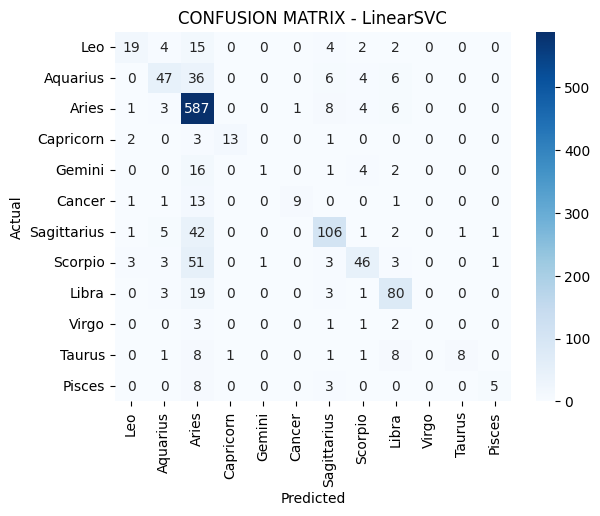

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d', xticklabels=sign_id_df.sign.values, yticklabels=sign_id_df.sign.values)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("CONFUSION MATRIX - LinearSVC", size=12);

# Prediction

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1,2), stop_words="english")

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [ ]:
text = "       Well Kids. Tonight is the big show.  Actually, it's not really big.  There's only four bands, Planet Smashers, Catch 22, Mustard Plug and Big D and the kids table. That's not that many. I miss Warped Tour.  I'm taking the guys up..too bad I don't think I'm taking god up. That would rock rock rock. If god graces me with his presence tonight, I'll be a happy girl. I'll also be a happy girl if I meet some new boys. That's right. Another song you kids need is 'Long Goodnight,' by the get up kids, and 'I belive in a thing called love,' by the darkness. Those are pretty nifty selections. I actually wanted to catch some sleep before we hit the road, but I don't know if I'll be able too. Ugh. This will be interesting. Esecially because I have a high hate-tred, for ska. Yes, I know. That makes no sense, and why am I going right? Well, put it too you this way, it's a show, and It's in Cleveland, only $10 and I'm going with the guys. I've never been to a show with them. This will be fun! .. I think .. If I don't die in the pit first.  I'm going to go, if anyone wants to come along tonight, your more than welcome. Just bring some powerade and all will be fine.    "
print(model.predict(fitted_vectorizer.transform([text])))

['Libra']


**Inference:**
  The performance metrics for different models are as follows:

LinearSVC: Accuracy - 66.34%
LogisticRegression: Accuracy - 62.18%  
MultinomialNB: Accuracy - 52.24%
RandomForestClassifier: Accuracy - 60.54%

The inference drawn is that the TfidfVectorizer outperformed other vectorization methods in the given task and the best model is LinearSVC with 73.68% accuracy.